In [2]:
##Importing the necessary libraries 
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##Importing the required CSVs and  printing their dimensions 
test = pd.read_csv("C:\Users\Vishesh Gupta\Desktop\Titanic_Kaggle\\test.csv")
train = pd.read_csv("C:\Users\Vishesh Gupta\Desktop\Titanic_Kaggle\\train.csv")
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


AttributeError: 'module' object has no attribute 'show'

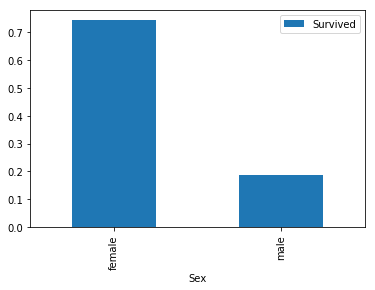

In [7]:
##Plotting the relation between survival and gender
%matplotlib inline
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

AttributeError: 'module' object has no attribute 'show'

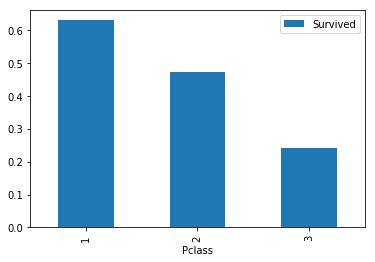

In [8]:
##Observing the survival rate on the basis of 
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

In [9]:
##Observing the patterns in the age
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
## We now observe the survival and death rates based on the differnt ages from 0.4 to 80
survived = train[train["Survived"] == 1] ##The entire dataset but only the survived guys 
died = train[train["Survived"] == 0]  ##The entire dataset but only the dead guys 

In [13]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


TypeError: 'module' object is not callable

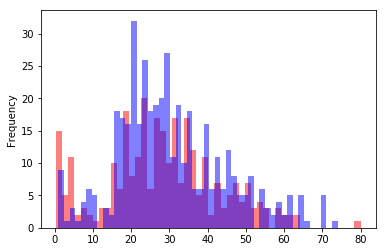

In [17]:
##Relationship between survived or dead and the age groups
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])

In [18]:
print(train["Age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


AttributeError: 'module' object has no attribute 'show'

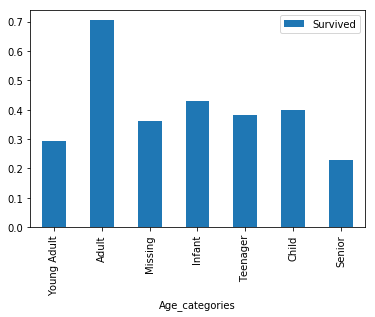

In [21]:
##Segregating the ages into various sub-categories like Missing, Teenager etc
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult


In [24]:
##Since the Pclass, Sex and Age_categories are of different values and some of them are strings, we put in the dummy values for 
##them and then try to implement our model. 
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [33]:
print(train.columns)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'Age_categories', u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Sex_female',
       u'Sex_male', u'Age_categories_Missing', u'Age_categories_Infant',
       u'Age_categories_Child', u'Age_categories_Teenager',
       u'Age_categories_Young Adult', u'Age_categories_Adult',
       u'Age_categories_Senior'],
      dtype='object')


In [45]:
##Importing the three modules that we are testing on 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC as SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
##Renaming test as holdout
holdout = test 

In [47]:
##Making the features and target arrays 
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [86]:
LR = LogisticRegression()
LR.fit(train_X, train_y)
predictions = LR.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


In [87]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()  ##default numner of neighbors is 5
KNN.fit(train_X, train_y)
predictions = KNN.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


In [88]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(train_X, train_y)
predictions = SVM.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.7877094972067039


In [89]:
##Now predicting the accuracy using the cross validation method
from sklearn import model_selection
models = []
models.append(("LR" , LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM", SVC()))
scoring = 'accuracy'
names = [] ##Has all the three models names
results = [] ##as the name suggests

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 1)
    cross_val_results = model_selection.cross_val_score(model, train_X , train_y, cv = kfold , scoring = scoring) 
    ##The cv splits the training data into 10 rows and uses each row for testing against the others for training. 
    results.append(cross_val_results)
    names.append(name)
    message = "%s %s :%f (%s :%f)" % (name, "Mean" , cross_val_results.mean() , "Standard Deviation" , cross_val_results.std())
    print(message)

LR Mean :0.797829 (Standard Deviation :0.030926)
KNN Mean :0.782394 (Standard Deviation :0.047110)
SVM Mean :0.786620 (Standard Deviation :0.036294)


In [64]:
print(all_y.shape)

(891L,)


In [93]:
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])
print (len(holdout_predictions))

418


In [91]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [94]:
submission.to_csv("submission_final.csv",index=False)